<a href="https://colab.research.google.com/github/joaodpcm/MDA/blob/preprocessing_data_david/model_trial_mda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages


In [1]:
# Import libraries
!pip install pandas-profiling
!pip install ydata-profiling
!pip install geopy
!pip install autoviz
!pip install matplotlib
!pip install -U textblob
!pip install statsmodels
!pip install missingno
!python -m textblob.download_corpora
!pip install missingpy
!pip install scikit-learn
!pip install sklearn
import numpy as np 
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import os
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6b665576a76ab3daddf17c9b89ac20407cc744c3812f4a

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 7.7 MB/s eta 0:00:00
  Created wheel for emoj

# Clone repository

In [2]:
#Accessing GitHub repository
!git clone <https://github.com/joaodpcm/MDAgit>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git clone <https://github.com/joaodpcm/MDAgit>'


In [4]:
# Setting package for drive
!pip install pyDrive
from google.colab import files
# Set path to the directory containing the meta dataset
path_copy_meteo = "ADD LOCAL FILE"
df_meteo = pd.read_csv(path_copy_meteo)
path_copy_noise = "ADD LOCAL FILE"
df_noise = pd.read_csv(path_copy_noise)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
df_noise = df_noise.rename(columns={"result_timestamp": "DATEUTC", "comp": "target"})

In [ ]:
df = df_meteo.merge(df_noise, how='inner', on='DATEUTC')

In [ ]:
df['DATEUTC'] = pd.to_datetime(df['DATEUTC'])

In [ ]:
df['nameday'] = df['DATEUTC'].dt.dayofweek


# Splitting data


In [ ]:
# Extracting correct features
from sklearn.model_selection import train_test_split
x = df[['LC_TEMP_QCL3', 'LC_HUMIDITY', 'LC_WINDSPEED', 'LC_RAININ',
       'LC_DAILYRAIN', 'nameday']]
  
y = df['target']

# Splitting data into train data and validation data 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

## Random Forest

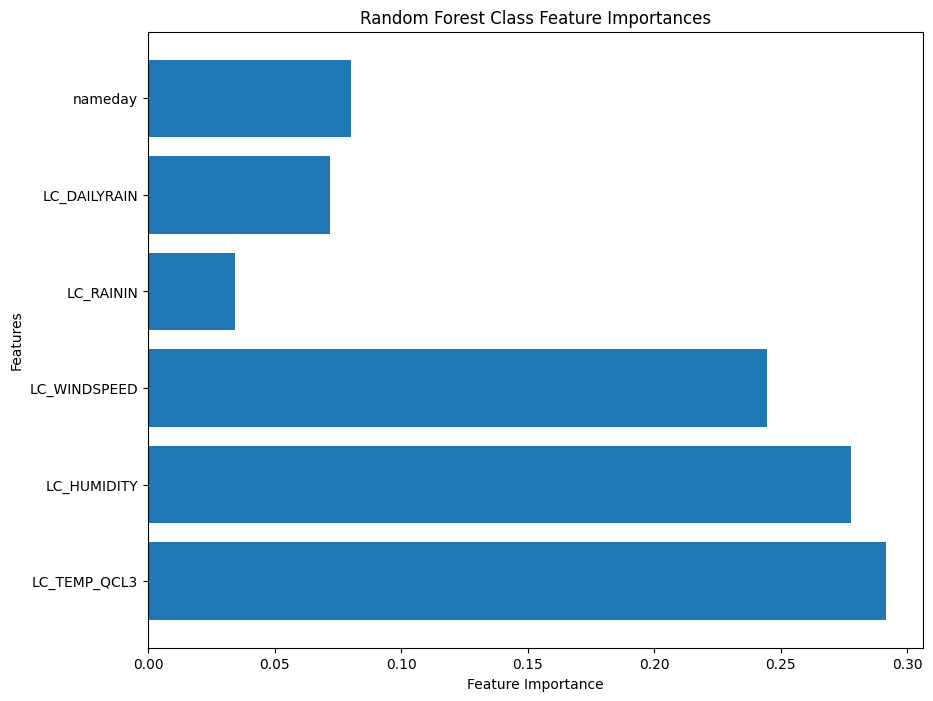

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.exceptions import NotFittedError
from sklearn.inspection import permutation_importance


# Define numeric and categorical features
numeric_features = ['LC_TEMP_QCL3', 'LC_HUMIDITY', 'LC_WINDSPEED', 'LC_RAININ',
       'LC_DAILYRAIN',]
categorical_features = ['nameday']

# Define transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with preprocessor and random forest regressor
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(n_estimators=300, random_state=42))
])

# Fit the pipeline on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfc = rfc.predict(X_test)

# Fit the OneHotEncoder transformer to the categorical features
categorical_transformer.fit(X_train[categorical_features])

# Get feature importances and names
importances = rfc.named_steps['regressor'].feature_importances_
encoded_cat_features = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(encoded_cat_features)
feature_importances = np.zeros(len(all_feature_names))

# Add the importances of the original numeric features
feature_importances[:len(numeric_features)] += importances[:len(numeric_features)]

# Combine the importances of the encoded categorical features into the original features
feature_importances = importances[:len(numeric_features)].tolist()  # Start with the numeric features
for i, feature_name in enumerate(categorical_features):
    encoded_cat_importances = [
        importances[j] for j, feat_name in enumerate(all_feature_names)
        if feat_name.startswith(feature_name + '_')
    ]
    feature_importances.append(sum(encoded_cat_importances))

# Get the names of the original features
original_feature_names = numeric_features + categorical_features

# Plot the feature importances
plt.figure(figsize=(10,8))
plt.barh(original_feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Class Feature Importances')
plt.show()

In [ ]:
# Plot for Random Forest

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred_rfc = rfc.predict(X_test)

# Create a classification report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

        High       0.63      0.27      0.38       308
Intermediate       0.77      0.94      0.84      1518
         Low       0.66      0.31      0.42       323

    accuracy                           0.75      2149
   macro avg       0.68      0.51      0.55      2149
weighted avg       0.73      0.75      0.71      2149



## Fitting the model into the data that Aknur collected

In [ ]:
# The online data is named unseen
unseen = [
    
]

In [6]:
# Generate predictions on the test set
prediction_app = rfc.predict(unseen)

NameError: ignored